In [14]:
import keras

from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [15]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.array(train_labels)
y_test = np.array(test_labels)

# sparse_categorical_crossentropy 손실 함수를 사용하기 위해서는 sparse_categorical_accuracy 메트릭을 설정해야 한다. 

In [22]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [23]:
history = model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 91us/step - loss: 2.4214 - sparse_categorical_accuracy: 0.5565 - val_loss: 1.6100 - val_sparse_categorical_accuracy: 0.6430
Epoch 2/20
7982/7982 [==============================] - 1s 79us/step - loss: 1.3292 - sparse_categorical_accuracy: 0.7171 - val_loss: 1.2751 - val_sparse_categorical_accuracy: 0.7130
Epoch 3/20
7982/7982 [==============================] - 1s 78us/step - loss: 1.0011 - sparse_categorical_accuracy: 0.7849 - val_loss: 1.1805 - val_sparse_categorical_accuracy: 0.7320
Epoch 4/20
7982/7982 [==============================] - 1s 78us/step - loss: 0.7902 - sparse_categorical_accuracy: 0.8307 - val_loss: 1.0397 - val_sparse_categorical_accuracy: 0.7670
Epoch 5/20
7982/7982 [==============================] - 1s 78us/step - loss: 0.6228 - sparse_categorical_accuracy: 0.8683 - val_loss: 0.9637 - val_sparse_categorical_accuracy: 0.8010
Epoch 6/20
7982/7982 [===============

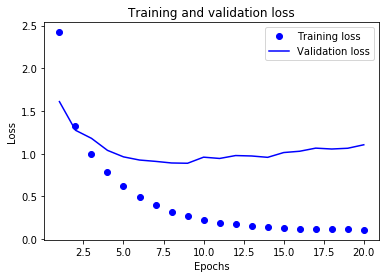

In [24]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

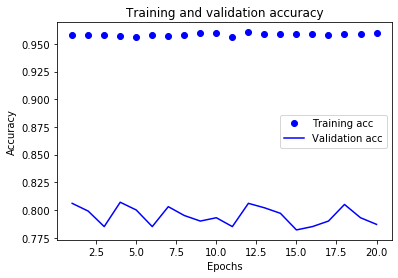

In [21]:
plt.clf()   # 그래프를 초기화합니다

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()